#### 다나와 무선청소기 데이터 시각화

##### 시각화용 모듈 import

In [1]:
import matplotlib
# from matplotlib import pyplot as plt
import matplotlib.pyplot as plt
from matplotlib import font_manager, rc, rcParams
import seaborn as sns

import pandas as pd
import numpy as np

font_path = 'C:/Windows/Fonts/NanumGothic.ttf'
font = font_manager.FontProperties(fname=font_path).get_name() # 'NanumGothic'
rc('font', family=font)
rcParams['axes.unicode_minus'] = False

In [5]:
# 데이터 가져오기
df_product = pd.read_excel('./3_다나와_핸디스틱청소기_결과.xlsx')
df_product

,카테고리,회사명,제품명,가격,사용시간,흡입력
0,핸디스틱청소기,삼성전자,비스포크 제트 VS20B956D5,555480,60.0,220.0
1,핸디스틱청소기,LG전자,오브제컬렉션 코드제로 A9S AX9984,1136630,60.0,250.0
2,핸디스틱청소기,LG전자,오브제컬렉션 코드제로 AS9202WD,530620,60.0,210.0
3,핸디스틱청소기,샤오미,드리미 V11,179000,90.0,250.0
4,핸디스틱청소기,삼성전자,비스포크 제트 VS20A956A3,479310,60.0,210.0
...,...,...,...,...,...,...
1029,핸디스틱청소기,에이스전자,AVE-801RCK,78200,NaN,NaN
1030,핸디스틱청소기,에이스전자,AVE-700BK,59500,20.0,72.0
1031,핸디스틱청소기,무궁화전자,바로바로 MHC-250,63050,20.0,NaN
1032,핸디스틱청소기,신일전자,SVC-4807SG,853020,5.0,35.0


In [7]:
# 사용시간 기준 정렬 / 결측치 NaN이 있으면 정렬도 안되지만, 통계도 제대로 안나옴
df_product.sort_values(['사용시간'], ascending=True)

,카테고리,회사명,제품명,가격,사용시간,흡입력
1032,핸디스틱청소기,신일전자,SVC-4807SG,853020,5.0,35.0
701,핸디스틱청소기,신일전자,SVC-40SG,45630,5.0,35.0
891,핸디스틱청소기,신일전자,SVC-1004NW,185070,7.0,NaN
867,핸디스틱청소기,무궁화전자,바로바로 MHC-100YB,34410,10.0,NaN
862,핸디스틱청소기,메가트론,루첸 MT-650,92000,10.0,NaN
...,...,...,...,...,...,...
1025,핸디스틱청소기,키친아트,WY-7070,76140,NaN,NaN
1026,핸디스틱청소기,마이프랜드,MTU-188C,37430,NaN,NaN
1028,핸디스틱청소기,에이스전자,AT-5000,50960,NaN,NaN
1029,핸디스틱청소기,에이스전자,AVE-801RCK,78200,NaN,NaN


In [8]:
# 추가 전처리 사용시간, 흡입력이 NaN이면, 0.0으로 치환
df_product.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1034 entries, 0 to 1033
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   카테고리    1034 non-null   object 
 1   회사명     1034 non-null   object 
 2   제품명     1034 non-null   object 
 3   가격      1034 non-null   int64  
 4   사용시간    899 non-null    float64
 5   흡입력     674 non-null    float64
dtypes: float64(2), int64(1), object(3)
memory usage: 48.6+ KB


In [9]:
# 사용시간 NaN 찾기
df_product['사용시간'].isna()

0       False
1       False
2       False
3       False
4       False
        ...  
1029     True
1030    False
1031    False
1032    False
1033     True
Name: 사용시간, Length: 1034, dtype: bool

In [12]:
# 사용시간 NaN을 0으로 대체 -> 결측치 제거하는 것 중 가장 일반적
df_product['사용시간'].fillna(0, inplace=True)

In [15]:
df_product

,카테고리,회사명,제품명,가격,사용시간,흡입력
0,핸디스틱청소기,삼성전자,비스포크 제트 VS20B956D5,555480,60.0,220.0
1,핸디스틱청소기,LG전자,오브제컬렉션 코드제로 A9S AX9984,1136630,60.0,250.0
2,핸디스틱청소기,LG전자,오브제컬렉션 코드제로 AS9202WD,530620,60.0,210.0
3,핸디스틱청소기,샤오미,드리미 V11,179000,90.0,250.0
4,핸디스틱청소기,삼성전자,비스포크 제트 VS20A956A3,479310,60.0,210.0
...,...,...,...,...,...,...
1029,핸디스틱청소기,에이스전자,AVE-801RCK,78200,0.0,0.0
1030,핸디스틱청소기,에이스전자,AVE-700BK,59500,20.0,72.0
1031,핸디스틱청소기,무궁화전자,바로바로 MHC-250,63050,20.0,0.0
1032,핸디스틱청소기,신일전자,SVC-4807SG,853020,5.0,35.0


In [14]:
# 흡입력 NaN을 0으로 치환
df_product['흡입력'].fillna(0, inplace=True)

In [17]:
# 사용시간 기준 정렬
df_product.sort_values(['사용시간'], ascending=False)

,카테고리,회사명,제품명,가격,사용시간,흡입력
136,핸디스틱청소기,헤몬,ST-6655,38900,180.0,120.0
154,핸디스틱청소기,리하스,LH20,198990,120.0,330.0
431,핸디스틱청소기,샤오미,이지에 YE-01,26510,120.0,0.0
327,핸디스틱청소기,자센,V17,332100,120.0,22.0
708,핸디스틱청소기,자센,V18,259000,120.0,22.0
...,...,...,...,...,...,...
403,핸디스틱청소기,제이앤케이,리빈치 LWC-100,99000,0.0,0.0
402,핸디스틱청소기,봅홈,B300,137510,0.0,0.0
861,핸디스틱청소기,트윈버드,TC-E123SBK,80790,0.0,70.0
397,핸디스틱청소기,길텐,GTC-2005,83260,0.0,0.0


In [18]:
# 흡입력 기준 정렬
df_product.sort_values(['흡입력'], ascending=False)

,카테고리,회사명,제품명,가격,사용시간,흡입력
74,핸디스틱청소기,아이룸,윈드포스 F9,189000,40.0,420.0
193,핸디스틱청소기,피빅,CWVB-300,188160,45.0,400.0
41,핸디스틱청소기,DIBEA,차이슨 ALLNEW22000 스노우화이트,198000,40.0,400.0
20,핸디스틱청소기,DIBEA,23년형 리뉴얼 차이슨 ALLNEW29000,239000,50.0,400.0
99,핸디스틱청소기,DIBEA,차이슨 ALLNEW29000,249000,48.0,390.0
...,...,...,...,...,...,...
200,핸디스틱청소기,보만,VC7210,49790,0.0,0.0
201,핸디스틱청소기,샤크,에보 파워 플러스 WV250KR2,152980,12.0,0.0
207,핸디스틱청소기,쿠쿠전자,파워클론 CVC-AE1410,314320,35.0,0.0
647,핸디스틱청소기,삼성전자,파워스틱 VS60K6050KW,2092500,30.0,0.0


In [19]:
# 가격 기준 정렬
df_product.sort_values(['가격'], ascending=False)

,카테고리,회사명,제품명,가격,사용시간,흡입력
643,핸디스틱청소기,삼성전자,비스포크 제트 VS20A957E2P,3289100,60.0,210.0
907,핸디스틱청소기,삼성전자,비스포크 제트 AI VS28C973ESE + VR50B9563AE,2948000,80.0,280.0
821,핸디스틱청소기,LG전자,코드제로 A9S 펫 AS9571BPGKT,2600000,60.0,210.0
749,핸디스틱청소기,LG전자,코드제로 A9S 펫 A9700BPK,2100000,60.0,200.0
858,핸디스틱청소기,테팔,에어포스360 TY9253,2098550,30.0,0.0
...,...,...,...,...,...,...
867,핸디스틱청소기,무궁화전자,바로바로 MHC-100YB,34410,10.0,0.0
363,핸디스틱청소기,제이앤케이,리빈치 LHV-100,32020,20.0,0.0
285,핸디스틱청소기,DS,KB-001,27990,0.0,85.0
276,핸디스틱청소기,유파,EKV-P500,26950,0.0,0.0


In [21]:
# 흡입력 & 사용시간 TOP리스트
top_list = df_product.sort_values(['흡입력', '사용시간'], ascending=False)
top_list

,카테고리,회사명,제품명,가격,사용시간,흡입력
74,핸디스틱청소기,아이룸,윈드포스 F9,189000,40.0,420.0
20,핸디스틱청소기,DIBEA,23년형 리뉴얼 차이슨 ALLNEW29000,239000,50.0,400.0
193,핸디스틱청소기,피빅,CWVB-300,188160,45.0,400.0
41,핸디스틱청소기,DIBEA,차이슨 ALLNEW22000 스노우화이트,198000,40.0,400.0
223,핸디스틱청소기,행커,400W,198000,60.0,390.0
...,...,...,...,...,...,...
1025,핸디스틱청소기,키친아트,WY-7070,76140,0.0,0.0
1026,핸디스틱청소기,마이프랜드,MTU-188C,37430,0.0,0.0
1028,핸디스틱청소기,에이스전자,AT-5000,50960,0.0,0.0
1029,핸디스틱청소기,에이스전자,AVE-801RCK,78200,0.0,0.0


##### 가성비 좋은 제품

In [29]:
# 평균값을 정리
price_mean = df_product['가격'].mean()
usetime_mean = df_product['사용시간'].mean()
suction_mean = df_product['흡입력'].mean()
print(f'가격 평균 : {price_mean}원, 사용시간 평균 : {usetime_mean}분, 흡입력 평균: {suction_mean}W')

가격 평균 : 418587.6005802708원, 사용시간 평균 : 38.20889748549323분, 흡입력 평균: 116.90599613152806W


In [37]:
condition = (df_product['가격'] <= price_mean) & (df_product['사용시간'] >= usetime_mean) & (df_product['흡입력'] >= suction_mean)
df_bestratio = df_product[condition]
df_bestratio

,카테고리,회사명,제품명,가격,사용시간,흡입력
3,핸디스틱청소기,샤오미,드리미 V11,179000,90.0,250.0
17,핸디스틱청소기,샤오미,드리미 V10,153216,60.0,220.0
20,핸디스틱청소기,DIBEA,23년형 리뉴얼 차이슨 ALLNEW29000,239000,50.0,400.0
23,핸디스틱청소기,아이닉,NEW i20 (23년형),169000,50.0,350.0
33,핸디스틱청소기,삼성전자,제트 VS20T92K3QD,412030,60.0,200.0
...,...,...,...,...,...,...
943,핸디스틱청소기,아이코넬,VC-K300W,198000,40.0,220.0
945,핸디스틱청소기,가포넷,가포 FOL-189A,106850,40.0,160.0
946,핸디스틱청소기,하트만,HVC-S8850BL,165000,40.0,170.0
947,핸디스틱청소기,제로홈,맥스 BLDC,165000,40.0,220.0


In [39]:
# axis=0 행 axis=1 열 
# 결측치 삭제
df_bestratio.dropna(axis=0)

,카테고리,회사명,제품명,가격,사용시간,흡입력
3,핸디스틱청소기,샤오미,드리미 V11,179000,90.0,250.0
17,핸디스틱청소기,샤오미,드리미 V10,153216,60.0,220.0
20,핸디스틱청소기,DIBEA,23년형 리뉴얼 차이슨 ALLNEW29000,239000,50.0,400.0
23,핸디스틱청소기,아이닉,NEW i20 (23년형),169000,50.0,350.0
33,핸디스틱청소기,삼성전자,제트 VS20T92K3QD,412030,60.0,200.0
...,...,...,...,...,...,...
943,핸디스틱청소기,아이코넬,VC-K300W,198000,40.0,220.0
945,핸디스틱청소기,가포넷,가포 FOL-189A,106850,40.0,160.0
946,핸디스틱청소기,하트만,HVC-S8850BL,165000,40.0,170.0
947,핸디스틱청소기,제로홈,맥스 BLDC,165000,40.0,220.0


In [45]:
# 흡입력, 사용시간 최대값/평균값
usetime_max = df_product['사용시간'].max()
usetime_mean = df_product['사용시간'].mean()
suction_max = df_product['흡입력'].max()
suction_mean = df_product['흡입력'].mean()

##### 데이터 분포 그래프 시각화

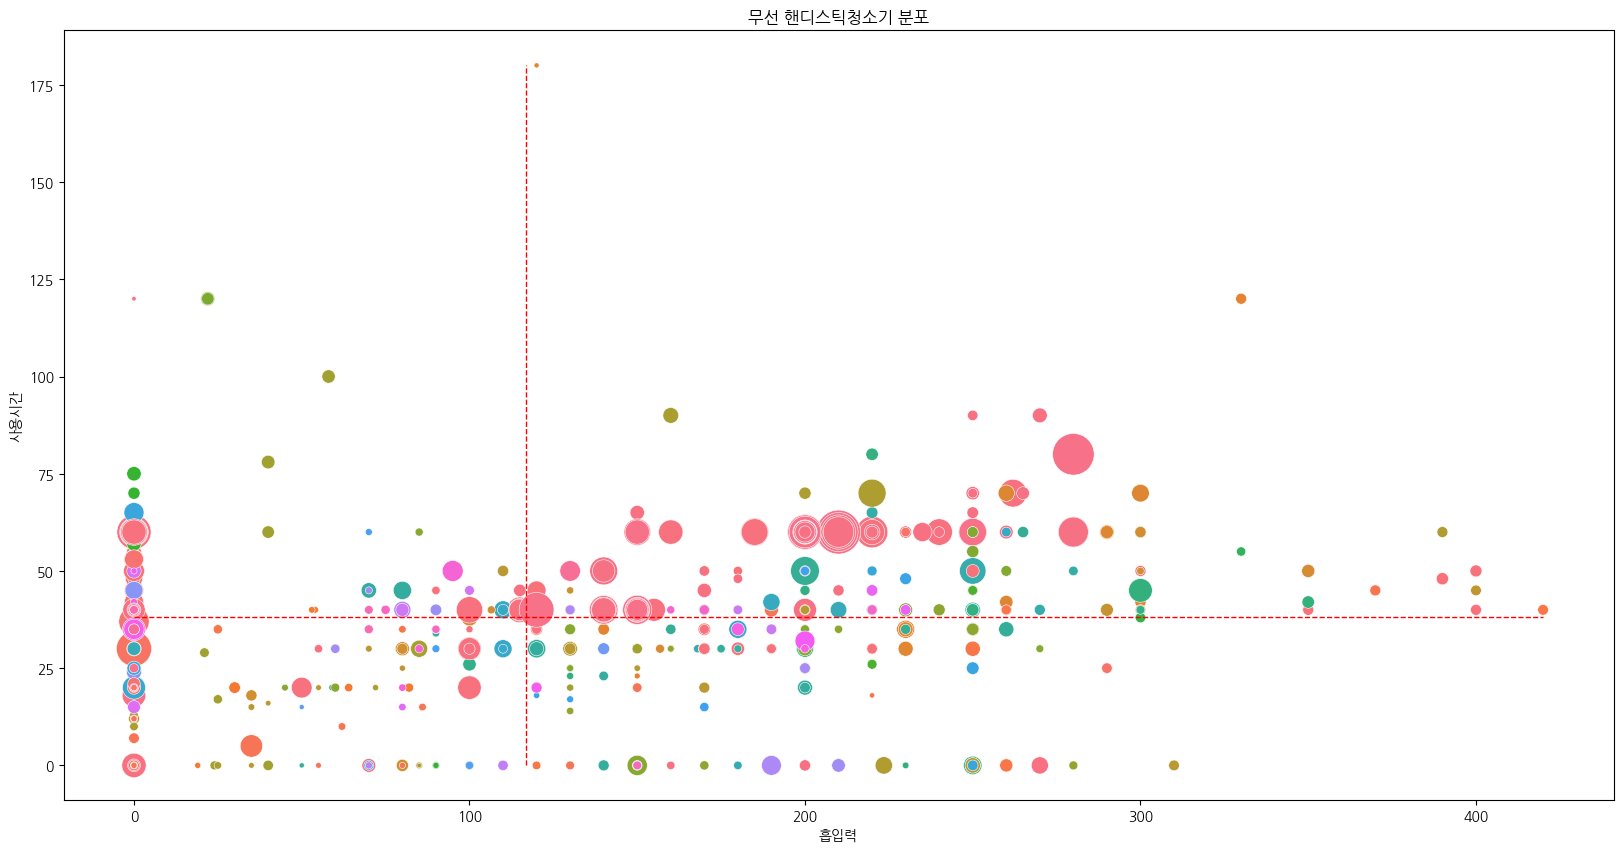

In [53]:
plt.figure(figsize=(20, 10))
plt.title('무선 핸디스틱청소기 분포')
sns.scatterplot(data=df_product, x='흡입력', y='사용시간', size='가격', hue=df_product['회사명'], legend=False, sizes=(10, 1000))
plt.plot([0, suction_max], [usetime_mean, usetime_mean], 'r--', lw=1)
plt.plot([suction_mean, suction_mean], [0, usetime_max], 'r--', lw=1)
plt.show()

In [55]:
# 상위 20개 제품의 모델비교
df_top20 = df_product[:20]
df_top20

,카테고리,회사명,제품명,가격,사용시간,흡입력
0,핸디스틱청소기,삼성전자,비스포크 제트 VS20B956D5,555480,60.0,220.0
1,핸디스틱청소기,LG전자,오브제컬렉션 코드제로 A9S AX9984,1136630,60.0,250.0
2,핸디스틱청소기,LG전자,오브제컬렉션 코드제로 AS9202WD,530620,60.0,210.0
3,핸디스틱청소기,샤오미,드리미 V11,179000,90.0,250.0
4,핸디스틱청소기,삼성전자,비스포크 제트 VS20A956A3,479310,60.0,210.0
5,핸디스틱청소기,다이슨,V12 디텍트 슬림 컴플리트,782910,60.0,150.0
6,핸디스틱청소기,LG전자,오브제컬렉션 코드제로 A9 AU9272WD,750510,60.0,220.0
7,핸디스틱청소기,LG전자,코드제로 A9S AT9200BA,580000,60.0,200.0
8,핸디스틱청소기,삼성전자,비스포크 제트 AI VS25C970DW,751470,60.0,250.0
9,핸디스틱청소기,LG전자,오브제컬렉션 코드제로 A9S AU9882,714290,60.0,220.0


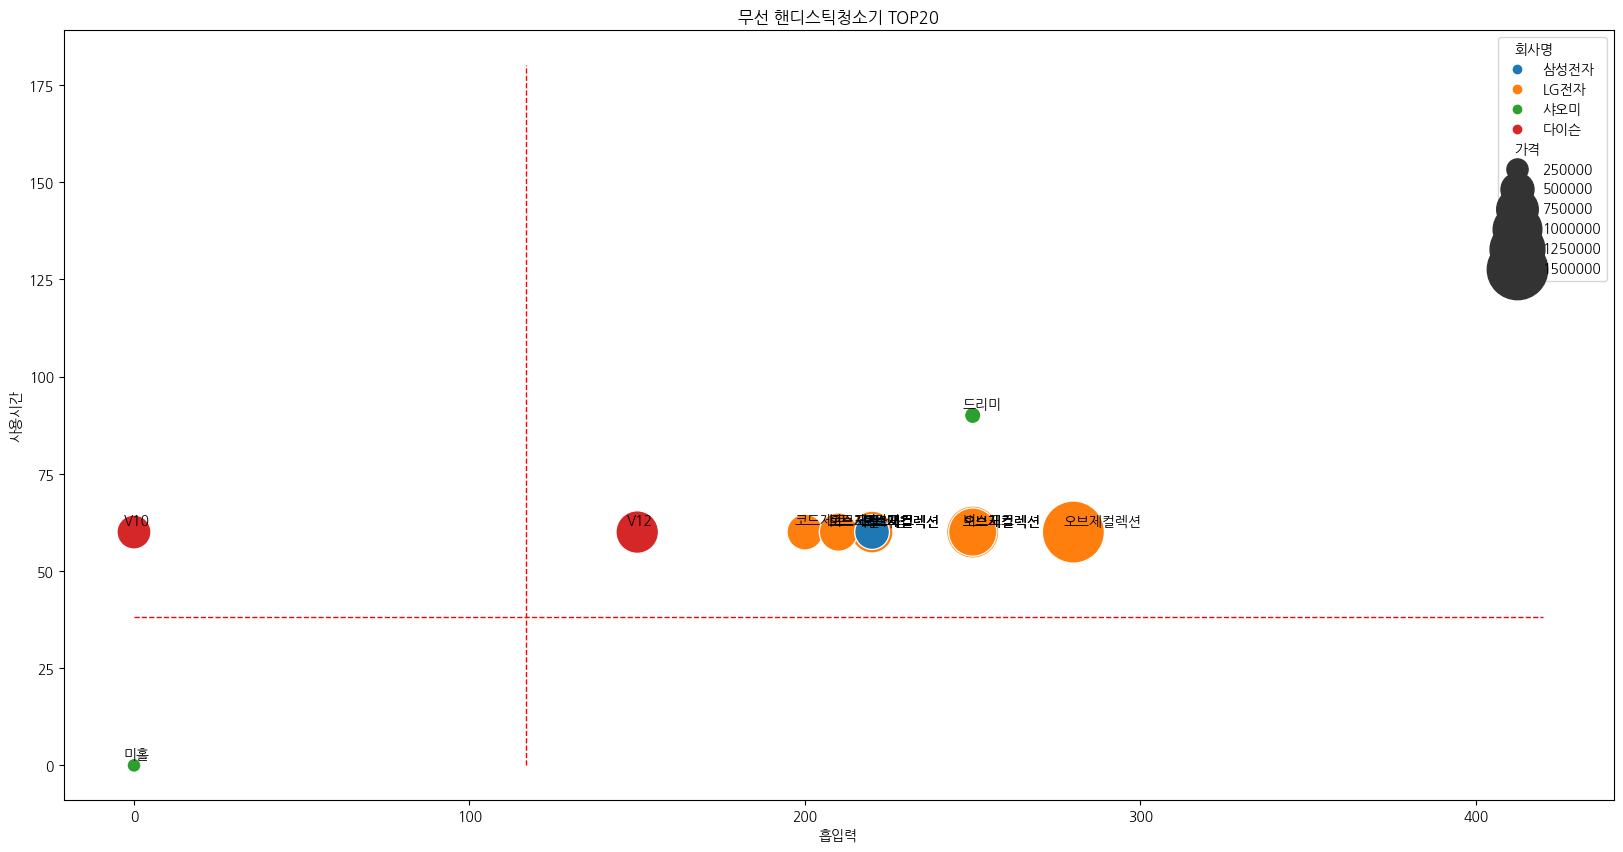

In [72]:
import math

# 20개 제품 시각화
plt.figure(figsize=(20, 10))
plt.title('무선 핸디스틱청소기 TOP20')
sns.scatterplot(data=df_top20, x='흡입력', y='사용시간', size='가격', hue=df_top20['회사명'], sizes=(100, 2000), legend=True)

plt.plot([0, suction_max], [usetime_mean, usetime_mean], 'r--', lw=1)
plt.plot([suction_mean, suction_mean], [0, usetime_max], 'r--', lw=1)

for index, row in df_top20.iterrows():
    x = row['흡입력']
    y = row['사용시간']
    s = row['제품명'].split(' ')[0]
    plt.text(x - 3, y + 2 , s, size=10)

plt.show()